# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html

soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = soup.find_all('table', class_='table')

In [6]:
rows

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
list = {}
# Loop through the scraped data to create a list of rows
for row in rows:
    row_heading = row.find('th').text
    row_data = row.find('td').text.strip()
    list[row_heading] = row_data
   

In [9]:
print(list)

{'id': '2'}


In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

In [211]:
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [212]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [213]:
# Confirm DataFrame was created successfully
mars_df.columns =['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [214]:
# Examine data type of each column
print(mars_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [215]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

mars_df['sol'] = mars_df['sol'].astype('int32')
mars_df['ls'] = mars_df['ls'].astype('int32')
mars_df['month'] = mars_df['month'].astype('int32')
mars_df['min_temp'] = mars_df['min_temp'].astype('float')
mars_df['pressure'] = mars_df['pressure'].astype('float')

In [216]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [217]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
print(f"There are {mars_months} months on Mars.")

There are 12 months on Mars.


In [218]:
# 2. How many sols (Martian days) worth of data are there?
mars_days = mars_df['sol'].nunique()
print(f"There are {mars_days} days in a martian year.")

There are 1867 days in a martian year.


In [219]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

print(average_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


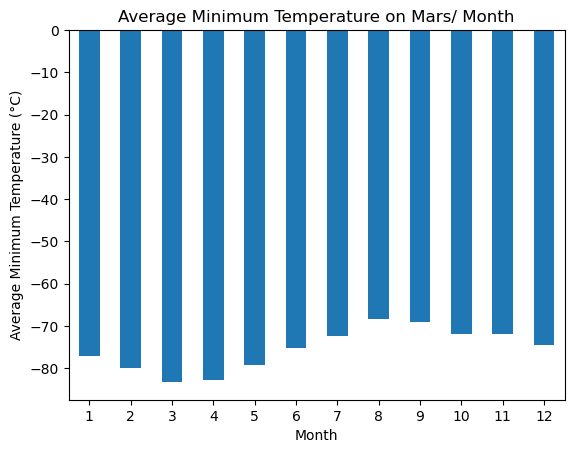

In [220]:
# Plot the average minimum temperature by month
average_min_temp_by_month.plot(kind='bar', title='Average Minimum Temperature on Mars/ Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  
plt.show()

In [221]:
# Calculate average atmospheric pressure for each month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
# Sort the results
sorted_temps = average_min_temp_by_month.sort_values()

In [222]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = sorted_temps.idxmin()
hottest_month = sorted_temps.idxmax()

print(f"The coldest month is: {coldest_month}")
print(f"The hottest month is: {hottest_month}")

The coldest month is: 3
The hottest month is: 8


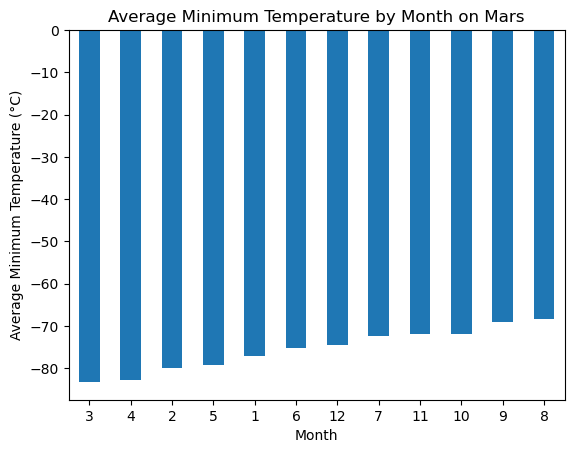

In [223]:
# Plot the results as a bar chart
sorted_temps.plot(kind='bar')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  
plt.show()

In [224]:
# 4. What is the average pressure by month?
# Group by month and calculate the average pressure
average_pressure = mars_df.groupby('month')['pressure'].mean()

# Print the average pressure by month
print(average_pressure)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


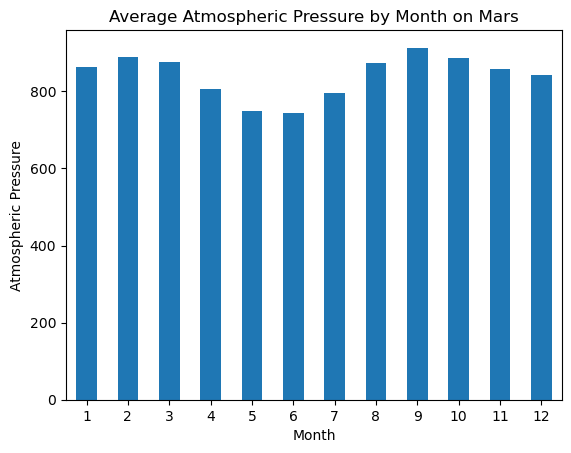

In [225]:
# Plot the average pressure by month
average_pressure.plot(kind='bar')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)  
plt.show()

In [226]:
# Sort the average pressure results
sorted_pressure = average_pressure.sort_values()

In [227]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()

print(f"The month with the lowest pressure is: Month {lowest_pressure_month} with an average pressure of {sorted_pressure.min()}")
print(f"The month with the highest pressure is: Month {highest_pressure_month} with an average pressure of {sorted_pressure.max()}")

The month with the lowest pressure is: Month 6 with an average pressure of 745.0544217687075
The month with the highest pressure is: Month 9 with an average pressure of 913.3059701492538


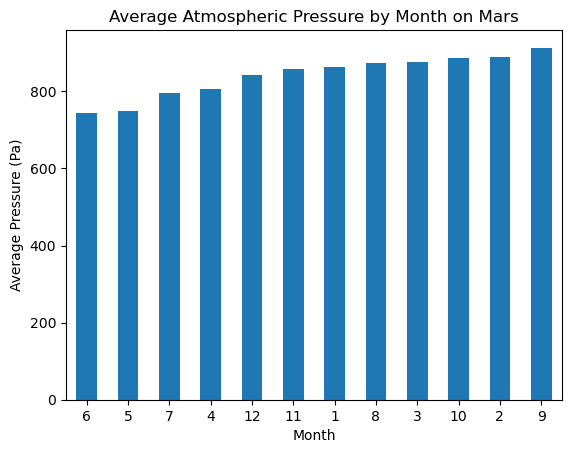

In [228]:
# Plot the results of lowest and highest pressure months in Curiosity's location in a bar chart
sorted_pressure.plot(kind='bar')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0) 
plt.show()

In [229]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Check the unique months in the DataFrame to confirm the Martian calendar
unique_mars_months = mars_df['month'].unique()
num_mars_months = len(unique_mars_months)

# Display the number of unique months
print(f"There are {num_mars_months} months on Mars.")

There are 12 months on Mars.


In [230]:
# Create a pandas Series to store the length of a Martian year in Earth days
martian_year_days = pd.Series({'Martian Year Length (in Earth Days)': 687})

# Display the result
print(martian_year_days)

Martian Year Length (in Earth Days)    687
dtype: int64


In [231]:
# Since we know Mars takes about 687 Earth days for a full year, we can confirm this:
martian_year_days = 687
print(f"A Martian year is approximately {martian_year_days} Earth days.")

A Martian year is approximately 687 Earth days.


In [232]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Check the unique months in the DataFrame to confirm the Martian calendar
unique_mars_months = mars_df['month'].unique()
num_mars_months = len(unique_mars_months)

# Display the number of unique months
print(f"There are {num_mars_months} months on Mars.")

# Since we know Mars takes about 687 Earth days for a full year, we can confirm this:
martian_year_days = 687
print(f"A Martian year is approximately {martian_year_days} Earth days.")

There are 12 months on Mars.
A Martian year is approximately 687 Earth days.


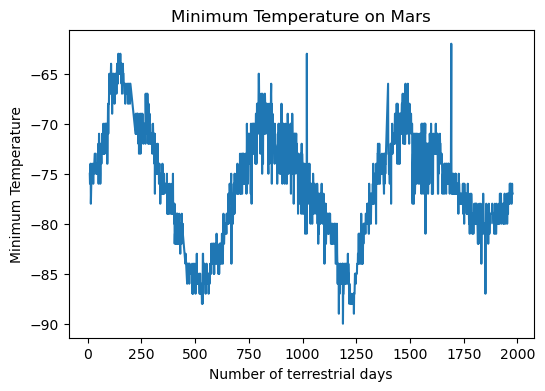

In [233]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Create a line plot for daily minimum temperature
plt.figure(figsize=(6, 4))
plt.plot(mars_df['sol'], mars_df['min_temp'])

# Add title and labels
plt.title('Minimum Temperature on Mars')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')

# Show the plot
plt.show()

#### Minimum Temperature

In [234]:
min_temperature = mars_df['min_temp'].min()
print(f"The minimum temperature is: {min_temperature}")

The minimum temperature is: -90.0


#### Atmospheric Pressure

In [235]:
min_atmospheric_pressure = mars_df['pressure'].min()
print(f"The minimum atmospheric pressure is: {min_atmospheric_pressure}")

The minimum atmospheric pressure is: 727.0


#### Year Length

In [236]:
# Since we know Mars takes about 687 Earth days for a full year, we can confirm this:
martian_year_days = 687
print(f"A Martian year is approximately {martian_year_days} Earth days.")

A Martian year is approximately 687 Earth days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [237]:
# Write the data to a CSV
mars_final_data = {"Minimum Temperature":[min_temperature],
        "Atmospheric Pressure":[min_atmospheric_pressure],
         "Year Length":[martian_year_days] }

mars = pd.DataFrame(mars_final_data)
mars

,Minimum Temperature,Atmospheric Pressure,Year Length
0,-90.0,727.0,687


In [238]:
#create output directory to save the csv file
import os

# Create the output directory if it does not exist
if not os.path.exists('output'):
    os.makedirs('output')

print("Output directory created")

Output directory created


In [239]:
# save the DataFrame to a CSV file in the 'output' directory
mars.to_csv('output/mars_collected_data.csv', index=False)

In [240]:
browser.quit()

final version